In [474]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [475]:
ackermann = pd.read_csv('./drift2/ackermann_drift.csv')
odom = pd.read_csv('./drift2/odomfil_drift.csv')
unfiltered_odom = pd.read_csv('./drift2/odom_drift.csv')
imu = pd.read_csv('./drift2/imu_drift.csv')

In [476]:
type(ackermann)

pandas.core.frame.DataFrame

In [477]:
ackermann_sorted = ackermann.sort_values(['sec','nanosec'], ignore_index=True)
odom_sorted = odom.sort_values(['sec', 'nanosec'], ignore_index=True)
throttle_sorted = unfiltered_odom.sort_values(['sec', 'nanosec'], ignore_index=True)
imu_sorted = imu.sort_values(['sec', 'nanosec'], ignore_index=True)

In [478]:
ackermann_sorted['time'] = ackermann_sorted['sec']+ackermann_sorted['nanosec']*1e-9
odom_sorted['time'] = odom_sorted['sec']+odom_sorted['nanosec']*1e-9
throttle_sorted['time'] = throttle_sorted['sec']+throttle_sorted['nanosec']*1e-9
imu_sorted['time'] = imu_sorted['sec']+imu_sorted['nanosec']*1e-9

In [479]:
odom_sorted.head()

,sec,nanosec,frame_id,child_frame_id,position_x,position_y,position_z,orientation_x,orientation_y,orientation_z,...,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,time
0,1741043535,141029128,map,base_link,-0.908528,6.739883,-3.266359e-22,7.329939e-23,-7.445415e-23,0.663246,...,-5.779526e-28,9.957624e-07,1.717794e-28,3.650077e-13,2.406669e-12,1.354678e-14,2.726199e-22,-8.009292e-22,0.034896,1.741044e+09
1,1741043535,191420657,map,base_link,-0.885308,6.790153,-2.055787e-23,2.031662e-23,-2.415930e-23,0.644037,...,-8.360170e-28,9.940779e-07,1.613469e-27,3.864920e-13,2.395186e-12,1.347557e-14,-1.226292e-22,1.835124e-21,0.034891,1.741044e+09
2,1741043535,239518689,map,base_link,-0.875503,6.847864,1.108146e-21,1.651885e-23,-1.693064e-23,0.615885,...,-7.117718e-28,9.948999e-07,6.828025e-28,4.155486e-13,2.381854e-12,1.340339e-14,-2.172931e-22,4.621841e-21,0.034891,1.741044e+09
3,1741043535,275757967,map,base_link,-0.860510,6.880077,-1.021515e-22,1.598492e-23,-1.892916e-23,0.606021,...,-3.654985e-28,9.972557e-07,2.338739e-29,4.343770e-13,2.372604e-12,1.336015e-14,1.267561e-22,9.752113e-22,0.034895,1.741044e+09
4,1741043535,339324105,map,base_link,-0.807199,6.950521,1.075890e-22,1.686338e-23,-8.233434e-23,0.573543,...,-9.218418e-28,9.937228e-07,1.125993e-29,4.970867e-13,2.448480e-12,1.377792e-14,-4.817132e-23,1.348856e-22,0.034895,1.741044e+09


In [480]:
tables = [ackermann_sorted, odom_sorted, throttle_sorted, imu_sorted]

ackermann_sorted_interpolated = pd.DataFrame()
odom_sorted_interpolated = pd.DataFrame()
throttle_sorted_interpolated = pd.DataFrame()
imu_sorted_interpolated = pd.DataFrame()
new_tables = [ackermann_sorted_interpolated, odom_sorted_interpolated, throttle_sorted_interpolated, imu_sorted_interpolated]

for table, new_table in zip(tables,new_tables):
    for column in table.select_dtypes(include=[np.number]).columns:
        new_table[column] = np.interp(np.linspace(0, 1, len(odom_sorted['time'])), np.linspace(0, 1, len(table[column])), table[column])

In [481]:
#imu_sorted_interpolated = pd.DataFrame()
#imu_sorted_interpolated['time'] = np.interp(np.linspace(0, 1, len(odom_sorted['time'])), np.linspace(0, 1, len(imu_sorted['time'])), imu_sorted['time'])

# interpolate: time, throttle, steering angle, twist_linear_x and y, twist_angular_z(imu)

In [482]:
throttle = ackermann_sorted_interpolated['speed']

In [483]:
imu_sorted_interpolated['twist_angular_z'] = np.deg2rad(imu_sorted['twist_angular_z'])

#odom_sorted = odom_sorted.drop(odom_sorted.index[odom_sorted['sec'] > 36])
#throttle_sorted = throttle_sorted.drop(throttle_sorted.index[throttle_sorted['sec'] > 36])
#throttle_sorted = throttle_sorted.drop(throttle_sorted.index[throttle_sorted['nanosec'] > odom_sorted.loc[odom_sorted.index[-1]]['nanosec']])
#len(odom_sorted)
#odom_sorted.loc[odom_sorted.index[-1]]['nanosec']

In [484]:
# Twist X
#plt.plot((throttle_sorted['sec'] + throttle_sorted['nanosec'] * 10**-9), throttle_sorted['twist_linear_x'])
#plt.plot((odom_sorted['sec'] + odom_sorted['nanosec'] * 10**-9), odom_sorted['twist_linear_x'])


In [485]:

ackermann_sorted_interpolated['time'] = ackermann_sorted_interpolated['time'] - ackermann_sorted_interpolated['time'][0]
odom_sorted_interpolated['time'] = odom_sorted_interpolated['time'] - ackermann_sorted_interpolated['time'][0]
throttle_sorted_interpolated['time'] = throttle_sorted_interpolated['time'] -ackermann_sorted_interpolated['time'][0]
imu_sorted_interpolated['time'] = imu_sorted_interpolated['time'] - ackermann_sorted_interpolated['time'][0]
odom_sorted_interpolated['time'][0] -= ackermann_sorted_interpolated['time'][0]
odom_sorted_interpolated['time'][0]

1741043535.1410291

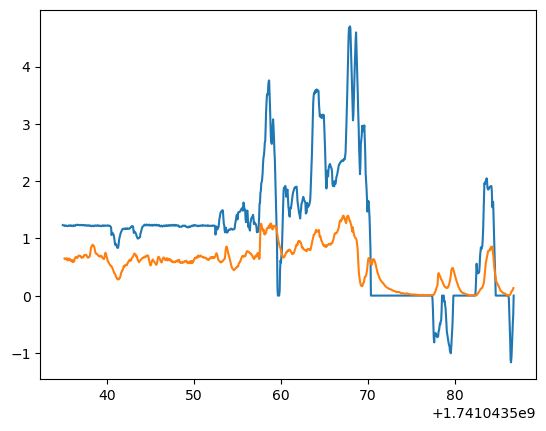

In [486]:
# Twist Magnitude
plt.plot(throttle_sorted_interpolated['time'], throttle_sorted_interpolated['twist_linear_x'])
plt.plot(odom_sorted_interpolated['time'], np.sqrt((odom_sorted_interpolated['twist_linear_y'] ** 2) + (odom_sorted_interpolated['twist_linear_x'] ** 2)))

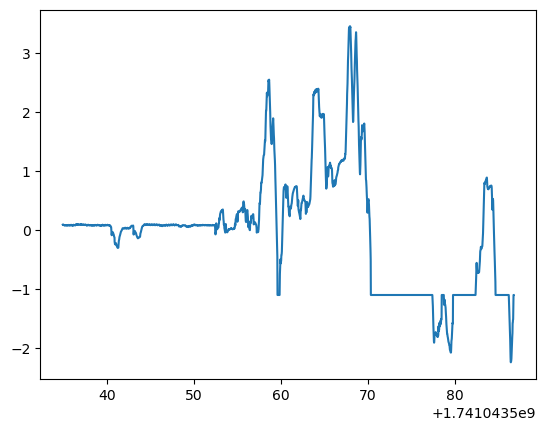

In [487]:
from sklearn.preprocessing import StandardScaler
from math import atan2, asin

# Scale throttle['speed'] and odom velocity
scaler = StandardScaler()
scaler.fit(throttle_sorted['twist_linear_x'].values.reshape(-1, 1))
throttle_scaled = scaler.transform(throttle_sorted['twist_linear_x'].values.reshape(-1, 1)).squeeze(axis=-1)

# Combine x and y
odom_comb = np.sqrt((odom_sorted['twist_linear_y'] ** 2) + (odom_sorted['twist_linear_x'] ** 2))

scaler.fit(odom_comb.values.reshape(-1, 1))
odom_scaled = scaler.transform(odom_comb.values.reshape(-1, 1)).squeeze(axis=-1)

# Resample to same length
odom_scaled = np.interp(np.linspace(0, 1, len(throttle_scaled)), np.linspace(0, 1, len(odom_scaled)), odom_scaled)
odom_position_x = np.interp(np.linspace(0, 1, len(throttle_scaled)), np.linspace(0, 1, len(odom_sorted['position_x'])), odom_sorted['position_x'])
odom_position_y = np.interp(np.linspace(0, 1, len(throttle_scaled)), np.linspace(0, 1, len(odom_sorted['position_y'])), odom_sorted['position_y'])

imu_twist_angular_z = np.interp(np.linspace(0, 1, len(odom_sorted)), np.linspace(0, 1, len(imu_sorted['twist_angular_z'])), imu_sorted['twist_angular_z'])

# Conver to yaw
yaws = []
for qx, qy, qz, qw in zip(odom_sorted['orientation_x'], odom_sorted['orientation_y'], odom_sorted['orientation_z'], odom_sorted['orientation_w']):
    yaw = atan2(2.0*(qy*qz + qw*qx), qw*qw - qx*qx - qy*qy + qz*qz)
    pitch = asin(-2.0*(qx*qz - qw*qy))
    roll = atan2(2.0*(qx*qy + qw*qz), qw*qw + qx*qx - qy*qy - qz*qz)
    yaws.append(yaw)

yaws = np.interp(np.linspace(0, 1, len(throttle_scaled)), np.linspace(0, 1, len(yaws)), yaws)

odom_orientation_x = np.interp(np.linspace(0, 1, len(throttle_scaled)), np.linspace(0, 1, len(odom_sorted['orientation_x'])), odom_sorted['orientation_x'])
odom_orientation_y = np.interp(np.linspace(0, 1, len(throttle_scaled)), np.linspace(0, 1, len(odom_sorted['orientation_y'])), odom_sorted['orientation_y'])
odom_orientation_z = np.interp(np.linspace(0, 1, len(throttle_scaled)), np.linspace(0, 1, len(odom_sorted['orientation_z'])), odom_sorted['orientation_z'])

plt.plot((throttle_sorted['sec'] + throttle_sorted['nanosec'] * 10**-9), throttle_scaled)
#plt.plot((throttle_sorted['sec'] + throttle_sorted['nanosec'] * 10**-9), odom_scaled)

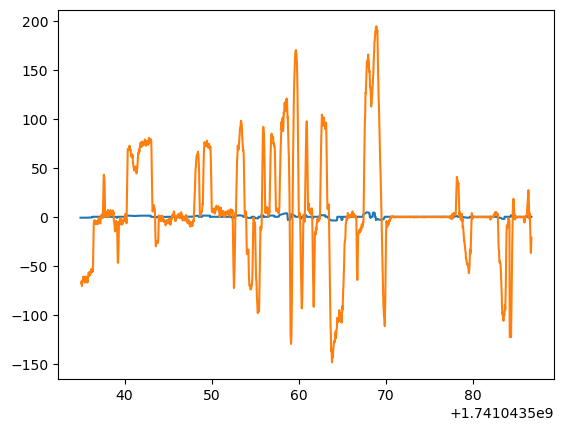

In [488]:
# Yaw Rates
wheelbase = 0.32
tire_width = 0.04445

turning_radius = wheelbase/np.tan(ackermann['steering_angle']) + 0.5*tire_width
theoretical_angular_velocity = throttle_sorted['twist_linear_x']*turning_radius

plt.plot((throttle_sorted['sec'] + throttle_sorted['nanosec'] * 10**-9), throttle_sorted['twist_angular_z'])
plt.plot((imu_sorted['sec'] + imu_sorted['nanosec'] * 10**-9), imu_sorted['twist_angular_z'])

ValueError: x and y must have same first dimension, but have shapes (2583,) and (1031,)

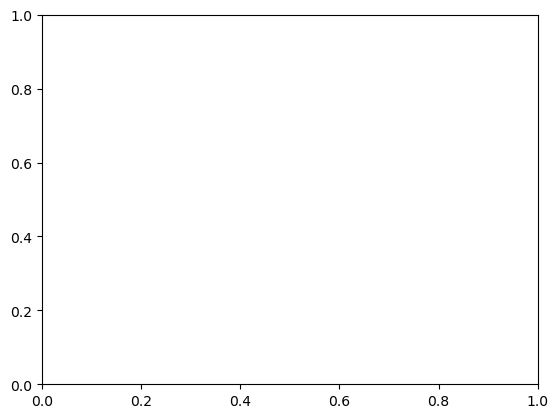

In [489]:
plt.plot(throttle_sorted['time'], (imu_twist_angular_z - odom_sorted['twist_angular_z']))

#yaw_difference = throttle_sorted['twist_angular_z'] - odom_sorted['twist_angular_z']

In [ ]:
len(imu_position_z)

737

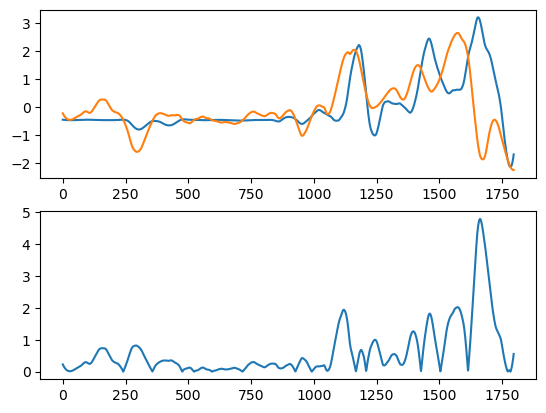

In [ ]:
# Plot the difference
from scipy.signal import savgol_filter

fig, axs = plt.subplots(2)

axs[0].plot(savgol_filter(throttle_scaled, 101, 3))
axs[0].plot(savgol_filter(odom_scaled, 101, 3))

axs[1].plot(np.abs(savgol_filter(throttle_scaled, 101, 3) - savgol_filter(odom_scaled, 101, 3)))

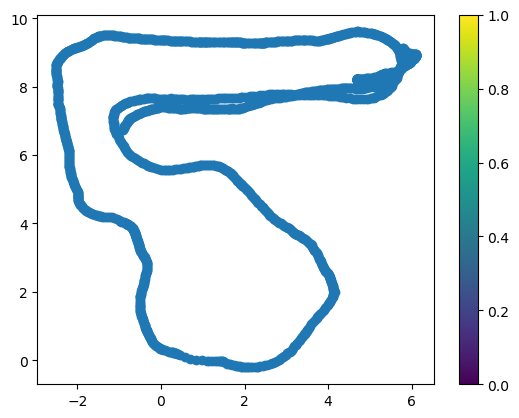

In [ ]:
plt.scatter(odom_position_x, odom_position_y, cmap=(yaw_difference))
plt.colorbar()

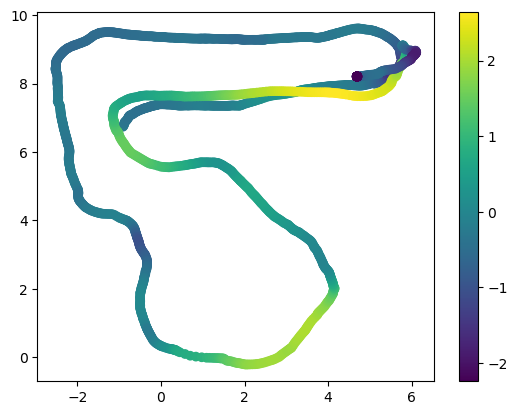

In [ ]:
plt.scatter(odom_position_x, odom_position_y, c=(savgol_filter(odom_scaled, 101, 3)))
plt.colorbar()

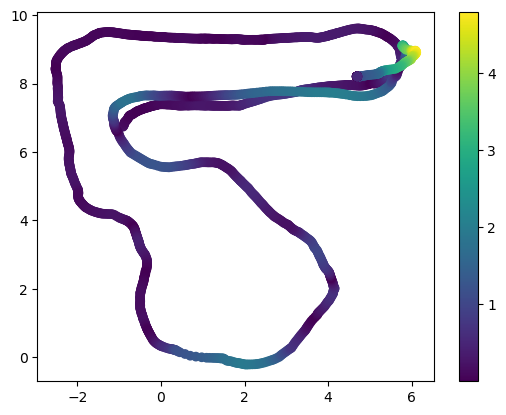

In [ ]:
plt.scatter(odom_position_x, odom_position_y, c=(np.abs(savgol_filter(throttle_scaled, 101, 3) - savgol_filter(odom_scaled, 101, 3))))
plt.colorbar()